In [5]:
d = '/media/shreyas/DATA/ML_DATA/wheelai/gtav/train/'
#d = '/media/shreyas/DATA/ML_DATA/wheelai/gtav/sample/'
data_path = d + 'dataset.pz'
val_data = '/media/shreyas/DATA/ML_DATA/wheelai/gtav/valid/dataset.pz'

x_trn_path = d + 'x_trn.bc'
t_trn_path = d + 't_trn.bc'
y_trn_path = d + 'y_trn.bc'

s_crp_path = d + 's_crp.bc'
x_crp_path = '/home/shreyas/Downloads/data/x_crp.bc'
v_crp_path = '/home/shreyas/Downloads/data/v_crp.bc'

x_rsz_path = '/home/shreyas/Downloads/data/x_crp.bc'
v_rsz_path = '/home/shreyas/Downloads/data/v_crp.bc'

x_val_path = '/media/shreyas/DATA/ML_DATA/wheelai/gtav/valid/x_val.bc'
y_val_path = '/media/shreyas/DATA/ML_DATA/wheelai/gtav/valid/y_val.bc'


In [6]:
from __future__ import division, print_function

import os, json
from glob import glob

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
import threading
import bcolz

In [8]:
tl = threading.local()

In [9]:
tl.place = np.zeros((160,320,3), 'uint8')
X_arr = bcolz.carray(np.empty((0, 160, 320, 3), 'float32'), 
                   chunklen=16, mode='w', rootdir=x_trn_path)
t_arr = bcolz.carray(np.empty((0, 1), 'float32'), 
                   chunklen=16, mode='w', rootdir=t_trn_path)
y_arr = bcolz.carray(np.empty((0, 3), 'float32'), 
                   chunklen=16, mode='w', rootdir=y_trn_path)

In [12]:
import pickle
import gzip
from deepgtav.messages import Start, Stop, Dataset, frame2numpy

with gzip.open(val_data, mode='rb', compresslevel=9) as f:
    while True:
            try:
                data = pickle.load(f)
                tl.place[:] = frame2numpy(data['frame'], (320, 160))
                X_arr.append(tl.place)
                #t_arr.append([data['trafficSigns']])
                y_arr.append([data['throttle'], data['brake'], data['steering']])
            except EOFError:
                break
    X_arr.flush()
    t_arr.flush()
    y_arr.flush()

In [27]:
X_trn = bcolz.open(x_trn_path)
X_trn.shape

(18887, 160, 320, 3)

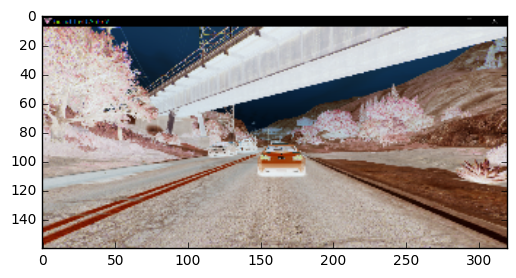

In [29]:
tl.img = np.zeros((80,320,3), 'uint8')
X_ = bcolz.carray(np.empty((0, 80, 320, 3), 'float32'), 
                   chunklen=16, mode='w', rootdir=v_crp_path)


In [18]:
def plot(img):
    plt.imshow(img)
    plt.show()
    
def crop_img(i):
    return X_trn[i][80:,]

def save_img(r):
    tl.img[:] = r
    X_crp.append(tl.img)

In [31]:
#from concurrent.futures import ThreadPoolExecutor
#import multiprocessing

#max_workers = multiprocessing.cpu_count()

In [32]:
#with ThreadPoolExecutor(max_workers=16) as exe:
#        result = exe.map(crop_img, range(10000))
#        for r in result: save_img(r)
#X_crp.flush()

In [33]:
for i in range(X_trn.shape[0]):
    tl.img[:] = crop_img(i)
    X_crp.append(tl.img)
X_crp.flush()

In [34]:
#X_crp = bcolz.open(x_crp_path)
X_crp.shape

(18885, 80, 320, 3)